In [1]:
# %matplotlib widget
import os
import warnings
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmaps
import geopandas as gpd
import numpy as np
import salem
import xarray as xr
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

warnings.filterwarnings("ignore")


In [2]:
# 设置相对路径
data_dir = os.path.join(os.path.pardir, "/home/ninglk/Chooyu/1_albedo/2Apr25/albedo_yr_without_water")

# shpfile
shp_tibet = "/home/ninglk/Chooyu/1_albedo/2Apr25/shpfiles/tibet.shp"
proj = ccrs.PlateCarree()  # 创建坐标系
wdreader = Reader(shp_tibet)
tibet = cfeature.ShapelyFeature(
    wdreader.geometries(), proj, edgecolor="k", facecolor="none")
tibetshp = gpd.read_file(shp_tibet)

In [3]:
GWIdelta_yr = xr.open_dataset(os.path.join(data_dir,'gwi_albedo_yr_mean_2001-2018.nc')).albedo.mean(dim='time')
GWIdelta_gs = xr.open_dataset(os.path.join(data_dir,'gwi_albedo_gs_mean_2001-2018.nc')).albedo.mean(dim='time')
GWIdelta_ngs = xr.open_dataset(os.path.join(data_dir,'gwi_albedo_ngs_mean_2001-2018.nc')).albedo.mean(dim='time')

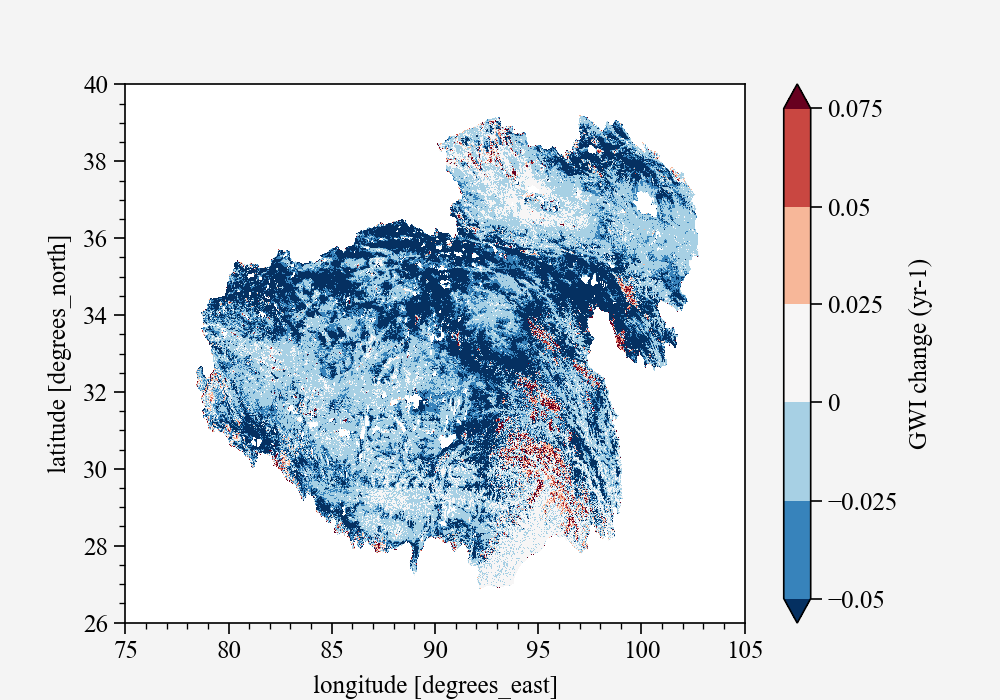

In [22]:
GWIdelta_yr.plot(
    levels=np.arange(-0.05, 0.080, 0.025) ,
    cmap='RdBu_r',
    vmin=-0.2, vmax=0.15,
    cbar_kwargs={'label': 'GWI change (yr-1)'},
    figsize=(5, 3.5),
)

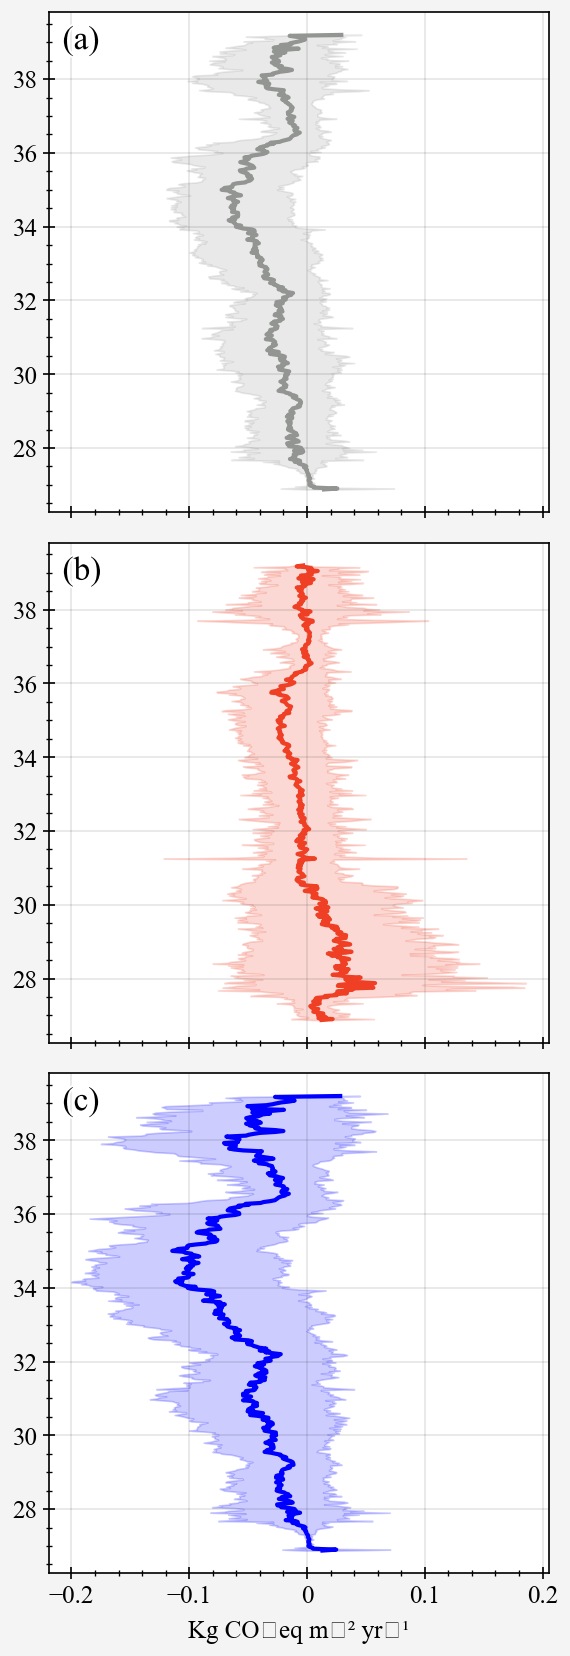

In [6]:
import ultraplot as uplt
uplt.rc['font.family'] = ['Times New Roman', 'FangSong'] 
uplt.rc['mathtext.fontset'] = 'stix'
uplt.rc['axes.unicode_minus'] = True
# uplt.rcParams['axes.unicode_minus'] = False

aa = GWIdelta_yr.mean(dim='lon').values.flatten()
ab = GWIdelta_yr.std(dim='lon').values.flatten()
ac = GWIdelta_yr.lat.values.flatten()

ba = GWIdelta_gs.mean(dim='lon').values.flatten()
bb = GWIdelta_gs.std(dim='lon').values.flatten()

ca = GWIdelta_ngs.mean(dim='lon').values.flatten()
cb = GWIdelta_ngs.std(dim='lon').values.flatten()
# 创建图表
fig, axs = uplt.subplots(nrows=3, ncols=1, share=True)
axs[0].plot(aa, ac, color='grey')
axs[0].fill_betweenx(ac,aa-ab,aa+ab, alpha=0.2,color='grey') 

axs[1].plot(ba, ac, color='tomato')
axs[1].fill_betweenx(ac,ba-bb,ba+bb, alpha=0.2,color='tomato') 

axs[2].plot(ca, ac, color='blue')
axs[2].fill_betweenx(ac,ca-cb,ca+cb, alpha=0.2,color='blue') 

axs.format(
    # ylabel = 'Latitude(°)',
    # grid=True,
    xlabel = 'Kg CO₂eq m⁻² yr⁻¹',
    abc = '(a)',
    abcloc="ul",
    abcsize=12,
    labels=True,
    tickdir="inout",
    )
fig.save(
    "GWIdelta_SPM_b_update.tif",
    transparent=True,
    dpi=600,
    pad_inches=0.05,
    bbox_inches="tight",
    )

In [8]:
aa = GWIdelta_yr.values


In [25]:
# %matplotlib widget

# 定义一个标准中国区 ALBERS 投影
Alberts_China = ccrs.AlbersEqualArea(
    central_longitude=105, standard_parallels=(25.0, 47.0))

reader = Reader("/home/ninglk/Chooyu/1_albedo/2Apr25/shpfiles/tibet.shp")
tibet = cfeature.ShapelyFeature(
    reader.geometries(), Alberts_China, edgecolor="k", facecolor="none")
tibetshp = gpd.read_file("/home/ninglk/Chooyu/1_albedo/2Apr25/shpfiles/tibet.shp")

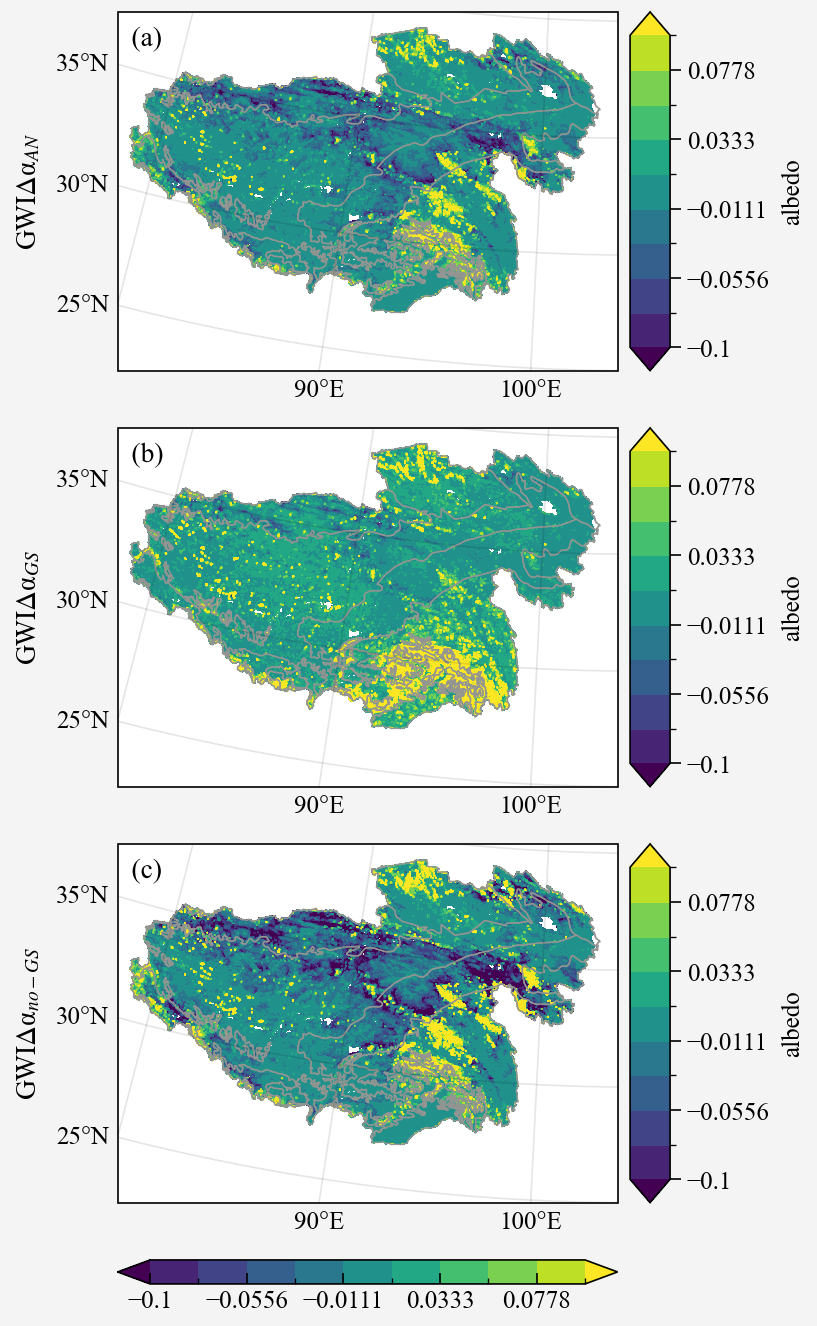

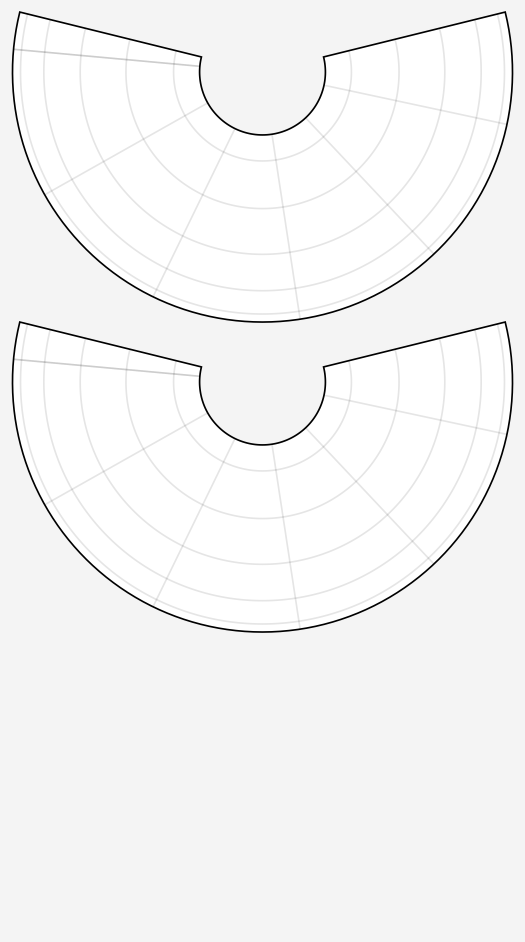

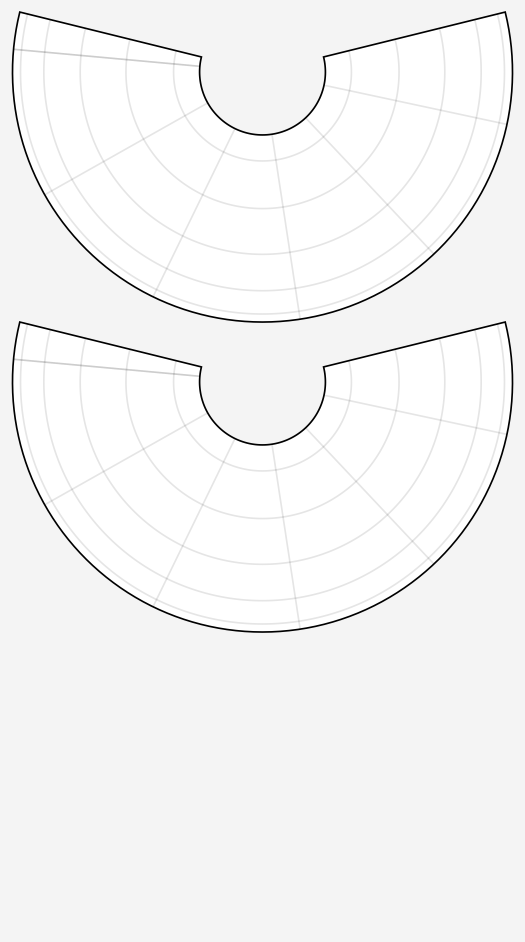

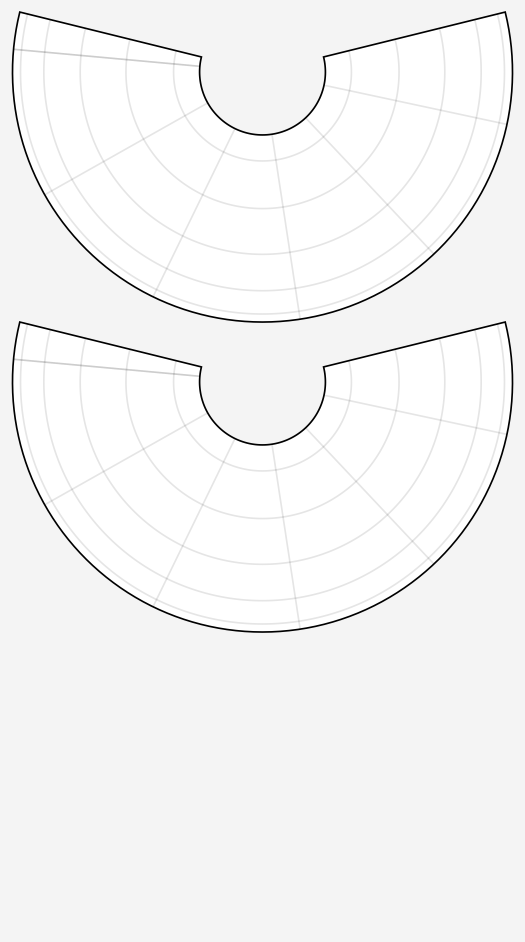

In [ ]:
# newmap = gvutil.truncate_colormap(cmaps.MPL_RdYlBu_r, minval=0.2, maxval=0.8, n=41, name=None)
# newmap = cmaps.MPL_RdYlBu_r
# pplt.rc.fontname = 'DejaVu Sans'
rrticks = np.arange(-0.10, 0.10, 0.02)
f, axs = uplt.subplots(proj=Alberts_China, nrows=3, ncols=1, share=True)
# for i, ax in enumerate(axs):
data = [GWIdelta_yr, GWIdelta_gs, GWIdelta_ngs]
# for i in range(0,3):
for i, ax in enumerate(axs):
    # print(data[i])
    m = data[i].salem.roi(shape=tibetshp).plot.contourf(
                    ax=ax,
                    # extend="both",
                    cmap=cmaps.MPL_RdYlBu_r,
                    vmin=-0.1,
                    vmax=0.11,
                    levels=10,
                    # norm="segmented",
                    )
    
    # m = axs[i].contourf(data[i].salem.roi(shape=tibetshp),
    #                     extend="both",
    #                     cmap=newmap,
    #                     levels=rrticks,
    #                     norm="segmented",)
    # # 创建插入图的坐标轴
    # ax_inset = inset_axes(axs[i], width="33%", height="33%", loc="lower left", 
    #                       bbox_to_anchor=(0.10, 0.03, 0.8, 0.8), 
    #                       bbox_transform=axs[i].transAxes)
    # ax_inset.hist(data[i].values.flatten(), bins=10, density=True, alpha=0.7, lw=0.5, color='lightgray')
    # ax_inset.set_ylabel('pdf')
    # # 隐藏插入图的右边和上边框线
    # ax_inset.spines['right'].set_visible(False)
    # ax_inset.spines['top'].set_visible(False)
    # # 移除图中图的网格线
    # ax_inset.grid(False)
    # # 设置图中图的背景色为透明
    # ax_inset.set_facecolor('none')
    # # 设置图中图轴标签朝内
    # ax_inset.tick_params(axis='both', which='both', direction='in')

    ax.add_geometries(
        Reader("/home/ninglk/Chooyu/1_albedo/2Apr25/shpfiles/Eco-TP.shp").geometries(),
        ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="grey",
        linewidth=0.5,)

axs.format(
    abc = '(a)',
    abcloc="ul",
    # abcsize=16,
    labels=True,
    # ticklabelsize='10',
    lonlines=10,
    latlines=5,
    latlim=(25, 38),
    lonlim=(80, 104),
    # title="Trend of annual number of diurnal freeze-thaw cycle",
    # titlesize=16,
    # rtitle = 'days/10yr',
    rowlabels=['GWI$\Delta$α$_{AN}$', 'GWI$\Delta$α$_{GS}$', 'GWI$\Delta$α$_{no-GS}$', ],)
# cbar = f.colorbar(m, loc='b', width=0.12, drawedges=False, tickdir='in',label = '')
                  # label = 'Albedo')
cbar = f.colorbar(m, loc='b', width=0.12, drawedges=False, 
                  label="Kg CO₂eq m⁻² yr⁻¹", tickdir='in')
f.save(
    "alebdo_SPM_a.pdf",
    transparent=True,
    dpi=600,
    pad_inches=0.05,
    bbox_inches="tight",
    )

In [28]:
cbar = f.colorbar(m, loc='b', width=0.12, drawedges=False, label="Kg Ceq m\u207B\u00B2", tickdir='in')
f.save(
    "gwidelta_SPM_a.tif",
    transparent=True,
    dpi=600,
    pad_inches=0.05,
    bbox_inches="tight",
    )
